# Toy Datasets

## Dataset 1

/Users/hiroki/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


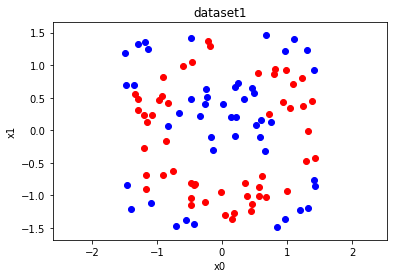

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(seed = 16)

n = 100
x = 3 * (np.random.rand(n, 2) - 0.5)
radius = np.reshape(np.power(x[:, 0], 2) + np.power(x[:, 1], 2), (100, 1))
y = (radius > 0.7 + 0.1 * np.random.randn(n, 1)) & (radius < 2.2 + 0.1 * np.random.randn(n, 1))
y = 2 * y -1;
dataset1 = np.c_[x, y]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(dataset1[dataset1[:, 2] == 1, 0], dataset1[dataset1[:, 2] == 1, 1], c = 'red')
ax.scatter(dataset1[dataset1[:, 2] == -1, 0], dataset1[dataset1[:, 2] == -1, 1], c = 'blue')
ax.set_title('dataset1')
ax.set_xlabel('x0')
ax.set_ylabel('x1')
plt.axes().set_aspect('equal', 'datalim')
fig.show()

## Dataset 2

/Users/hiroki/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


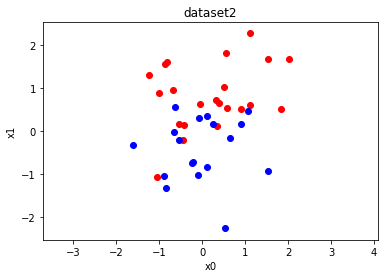

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(seed = 16)

n = 40
omega = np.random.randn(1, 1)
noise = 0.8 * np.random.randn(n, 1)

x = np.random.randn(n, 2)
y = 2 * (np.reshape(omega * x[:, 0] + x[:, 1], (40, 1)) + noise > 0) - 1
dataset2 = np.c_[x, y]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(dataset2[dataset2[:, 2] == 1, 0], dataset2[dataset2[:, 2] == 1, 1], c = 'red')
ax.scatter(dataset2[dataset2[:, 2] == -1, 0], dataset2[dataset2[:, 2] == -1, 1], c = 'blue')
ax.set_title('dataset2')
ax.set_xlabel('x0')
ax.set_ylabel('x1')
plt.axes().set_aspect('equal', 'datalim')
fig.show()


## Dataset 3

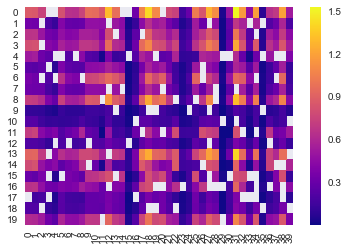

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

m = 20
n = 40
r = 2

A = np.dot(np.random.rand(m, r), np.random.rand(r, n))
ninc = 100
Q = random.sample(np.arange(n * m).tolist(), 100)

A = np.reshape(A, (m * n, 1))

for i in range(len(Q)):
    A[Q[i]] = None

A = np.reshape(A, (m, n))

sns.heatmap(A, cmap = 'plasma')

## Problem 1

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def get_prob(x0, x1, weight):
    feature_vector = np.array([x0, x1, 1])
    z = np.dot(feature_vector, weight)
    return sigmoid(z)

def calc_loss(dataset, weight, alpha = 1):
    risk = 0
    for i in range(len(dataset)):
        risk += math.log(1.0 + np.exp(dataset[i, 2] * (dataset[i, 0] * weight[0] + dataset[i, 1] * weight[1] + 1.0 * weight[2])))
    J = risk / len(dataset) + alpha * np.dot(weight, weight)
    return J

def steepest_gradient(dataset, weight, alpha = 1):
    sigma = 0,
    in_vec = np.c_[dataset[:, :2], np.zeros(len(dataset)) + 1]
    for i in range(len(dataset)):
        sigma += ((dataset[i, 2] * in_vec[i, :]) * (np.exp(-dataset[i, 2] * (np.dot(in_vec[i, :], weight))))) / (1 + np.exp(-dataset[i, 2] * (np.dot(in_vec[i, :], weight))))
    grad = sigma / len(dataset) + 2 * alpha * weight
    return grad


# Steepest Gradient Method
Dataset 2

In [6]:
w = np.random.randn(3)
eta = 0.01
ite = 10
log = []

for i in range(ite):
    log.append(calc_loss(dataset2, w))
    for j in range(len(dataset2)):
        pred = get_prob(dataset2[j, 0], dataset2[j, 1], w)
        if pred > 0.5:
            pred = 1
        else:
            pred = -1
    
        if pred * dataset2[j, 2] < 0:
            w = w - eta * steepest_gradient(dataset2, w)

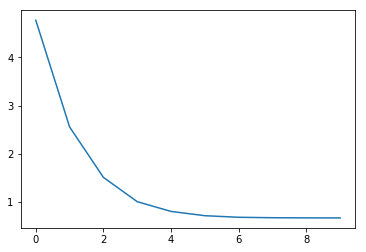

In [7]:
plt.plot(range(ite), log)

Dataset 1

In [10]:
w = np.random.randn(3)
eta = 0.01
ite = 10
log = []

for i in range(ite):
    log.append(calc_loss(dataset1, w))
    for j in range(len(dataset1)):
        pred = get_prob(dataset1[j, 0], dataset1[j, 1], w)
        if pred > 0.5:
            pred = 1
        else:
            pred = -1
    
        if pred * dataset1[j, 2] < 0:
            w = w - eta * steepest_gradient(dataset1, w)

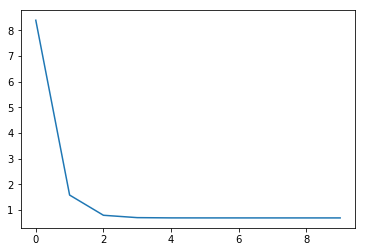

In [11]:
plt.plot(range(ite), log)

# Newton Method

In [13]:
w = np.random.randn(3)
eta = 0.01
ite = 10
log = []

for i in range(ite):
    log.append(calc_loss(dataset2, w))
    for j in range(len(dataset2)):
        pred = get_prob(dataset2[j, 0], dataset2[j, 1], w)
        if pred > 0.5:
            pred = 1
        else:
            pred = -1
    
        if pred * dataset2[j, 2] < 0:
            w = w - eta * (calc_loss(dataset2, w) / steepest_gradient(dataset2, w))

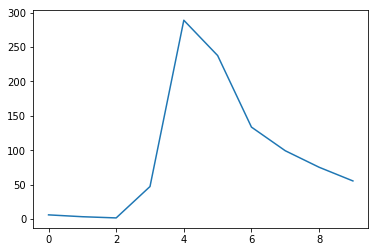

In [14]:
plt.plot(range(ite), log)

In [15]:
w

array([-6.29745216,  1.12108126,  0.63083389])